# LAYER SUBDIVISION

In [ ]:
%pylab inline
import pandas as pd
#import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import kstest
from statsmodels.stats import proportion
#sns.set()

In [14]:
trialMetadata=pd.read_csv("../TrialData/metadata.csv",index_col=0)
cellMetadata=pd.read_csv("../CellData/metadata1.csv",index_col=0)

In [24]:
cellMetadata["AHVModulated"]=np.nan
for i in range(len(cellMetadata)):
    if cellMetadata["include"].values[i]==1:
        if (cellMetadata["angularVelocityModulated"].values[i]==1 or cellMetadata["angularVelocityCCWModulated"].values[i]==1 or cellMetadata["absAngularVelocityModulated"].values[i]==1):
            cellMetadata["AHVModulated"].values[i]=1
        else:
            cellMetadata["AHVModulated"].values[i]=0

# LAYER AGGREGATION

In [16]:
deep=["LV","LVI"]
sup=["LI","LII","LIII"]
for i in range(len(cellMetadata)):
    if (cellMetadata["region"].values[i]=="PrS") and (cellMetadata["layer"].values[i] in deep):
               cellMetadata["layer"].values[i]="DEEP"
    if (cellMetadata["region"].values[i]=="PrS") and (cellMetadata["layer"].values[i] in sup):
               cellMetadata["layer"].values[i]="SUP"
    if (cellMetadata["region"].values[i]=="PaS") and (cellMetadata["layer"].values[i] in deep):
               cellMetadata["layer"].values[i]="DEEP"
    if (cellMetadata["region"].values[i]=="PaS") and (cellMetadata["layer"].values[i] in sup):
               cellMetadata["layer"].values[i]="SUP"
    if (cellMetadata["region"].values[i]=="MEC") and (cellMetadata["layer"].values[i]=="DEEP"):
        cellMetadata["region"].values[i]="PaS"
    if (cellMetadata["region"].values[i]=="MEC") and (cellMetadata["layer"].values[i]=="SUP"):
        cellMetadata["region"].values[i]="PaS"
               

# PERCENTAGES

## Speed

In [5]:
percentages=[]
modulated_list=[]
tot_num_list=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("MEC")
    print("speed modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("PaS")
    print("speed modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("PrS")
    print("speed modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
speed modulated cells in MEC layer LII: 7/35 , 0.2000 of cells in the layer
speed modulated cells in MEC layer LIII: 31/156 , 0.1987 of cells in the layer
speed modulated cells in MEC layer LV: 8/68 , 0.1176 of cells in the layer
speed modulated cells in MEC layer LVI: 18/133 , 0.1353 of cells in the layer
PaS
speed modulated cells in PaS layer DEEP: 48/190 , 0.2526 of cells in the layer
speed modulated cells in PaS layer SUP: 40/249 , 0.1606 of cells in the layer
PrS
speed modulated cells in PrS layer DEEP: 92/378 , 0.2434 of cells in the layer
speed modulated cells in PrS layer SUP: 33/227 , 0.1454 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.7473684210526316, pvalue=3.978141119387324e-05)

In [99]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

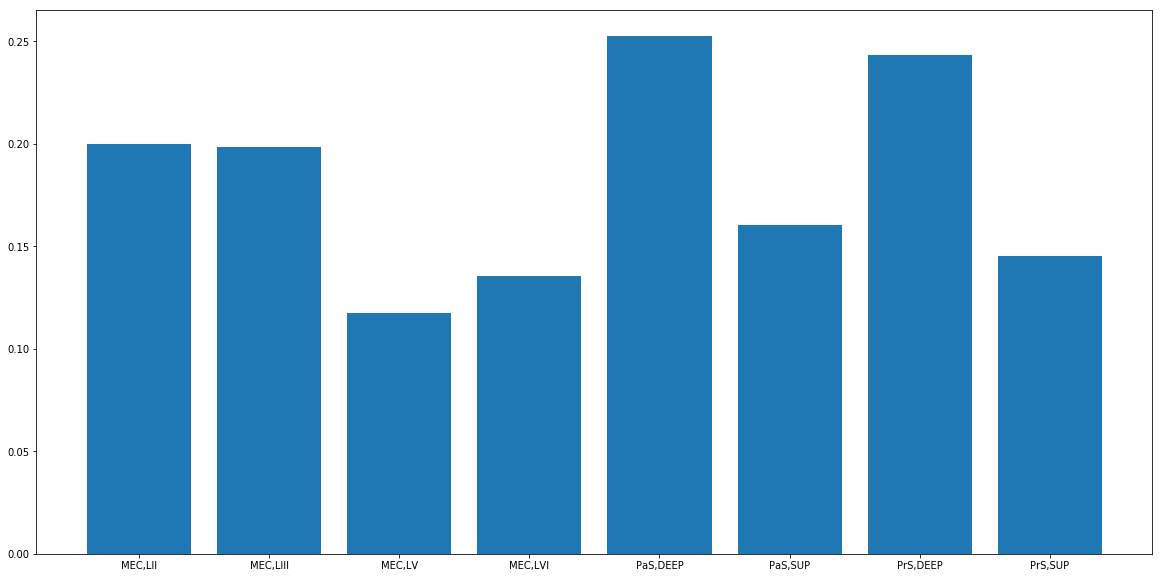

In [100]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S2/H1_speed_x_layer.svg")

In [34]:
# SINGLE LAYER ENRICHMENT TEST
from statsmodels.stats import proportion
for i in range(len(percentages)):
    count=[modulated_list[i],sum(modulated_list)]
    nobs=[tot_num_list[i],sum(tot_num_list)]
    zstat,pv=proportion.proportions_ztest(count,nobs)
    print(regions[i]+" "+ AllLayerNames[i]+" : zstat="+str(zstat)+", pvalue="+str(pv))


MEC LII : zstat=0.10519104773728347, pvalue=0.9162242141828959
MEC LIII : zstat=0.17480414794988416, pvalue=0.8612335289315662
MEC LV : zstat=-1.5471666900800471, pvalue=0.12182305591789865
MEC LVI : zstat=-1.6252827924995157, pvalue=0.10410231622790167
PaS DEEP : zstat=1.9349076197844175, pvalue=0.05300163298506912
PaS SUP : zstat=-1.2022441467124971, pvalue=0.22926894967743827
PrS DEEP : zstat=2.1696719194667, pvalue=0.030031708772676274
PrS SUP : zstat=-1.7084634209962732, pvalue=0.08755038808740515


## all AHV

In [14]:
cellMetadata["AHVModulated"]=np.nan
for i in range(len(cellMetadata)):
    if cellMetadata["include"].values[i]==1:
        if (cellMetadata["angularVelocityModulated"].values[i]==1 or cellMetadata["angularVelocityCCWModulated"].values[i]==1 or cellMetadata["absAngularVelocityModulated"].values[i]==1):
            cellMetadata["AHVModulated"].values[i]=1
        else:
            cellMetadata["AHVModulated"].values[i]=0

In [15]:
percentages=[]
modulated_list=[]
tot_num_list=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("MEC")
    print("AHV modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("PaS")
    print("AHV modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    modulated_list.append(len(modulated))
    tot_num_list.append(len(LayerCells))
    regions.append("PrS")
    print("AHV modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
AHV modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
AHV modulated cells in MEC layer LIII: 32/156 , 0.2051 of cells in the layer
AHV modulated cells in MEC layer LV: 13/68 , 0.1912 of cells in the layer
AHV modulated cells in MEC layer LVI: 22/133 , 0.1654 of cells in the layer
PaS
AHV modulated cells in PaS layer DEEP: 33/190 , 0.1737 of cells in the layer
AHV modulated cells in PaS layer SUP: 42/249 , 0.1687 of cells in the layer
PrS
AHV modulated cells in PrS layer DEEP: 72/378 , 0.1905 of cells in the layer
AHV modulated cells in PrS layer SUP: 32/227 , 0.1410 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.7948717948717949, pvalue=6.539222988433124e-06)

In [17]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

In [18]:
# SINGLE LAYER ENRICHMENT TEST
from statsmodels.stats import proportion
for i in range(len(percentages)):
    count=[modulated_list[i],sum(modulated_list)]
    nobs=[tot_num_list[i],sum(tot_num_list)]
    zstat,pv=proportion.proportions_ztest(count,nobs)
    print(regions[i]+" "+ AllLayerNames[i]+" : zstat="+str(zstat)+", pvalue="+str(pv))

MEC LII : zstat=-2.683259327901794, pvalue=0.0072908430753117134
MEC LIII : zstat=1.0567004636872268, pvalue=0.2906483133197957
MEC LV : zstat=0.42399371016401477, pvalue=0.671570400430241
MEC LVI : zstat=-0.1728386146165422, pvalue=0.8627782837124915
PaS DEEP : zstat=0.08160097662875666, pvalue=0.9349640246491648
PaS SUP : zstat=-0.10194818889456156, pvalue=0.918797799986033
PrS DEEP : zstat=0.8720000468334314, pvalue=0.38320835200154524
PrS SUP : zstat=-1.1384264643723896, pvalue=0.25494244864604976


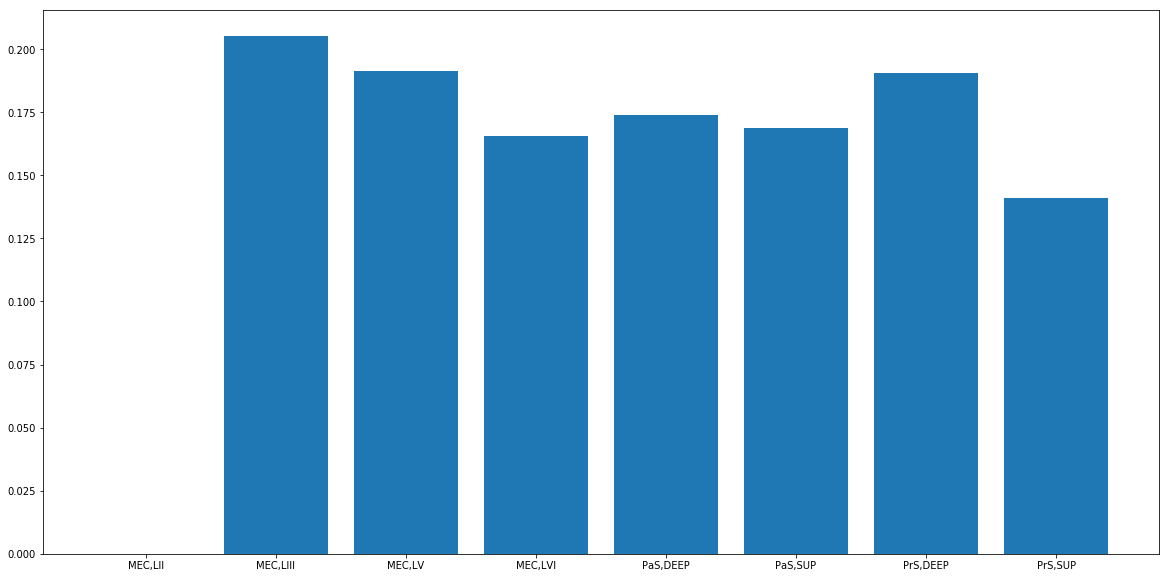

In [104]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S2/H2_all_AHV_x_layer.svg")

In [39]:
# SINGLE LAYER ENRICHMENT TEST
from statsmodels.stats import proportion
for i in range(len(percentages)):
    count=[modulated_list[i],sum(modulated_list)]
    nobs=[tot_num_list[i],sum(tot_num_list)]
    zstat,pv=proportion.proportions_ztest(count,nobs)
    print(regions[i]+" "+ AllLayerNames[i]+" : zstat="+str(zstat)+", pvalue="+str(pv))


MEC LII : zstat=-2.683259327901794, pvalue=0.0072908430753117134
MEC LIII : zstat=1.0567004636872268, pvalue=0.2906483133197957
MEC LV : zstat=0.42399371016401477, pvalue=0.671570400430241
MEC LVI : zstat=-0.1728386146165422, pvalue=0.8627782837124915
PaS DEEP : zstat=0.08160097662875666, pvalue=0.9349640246491648
PaS SUP : zstat=-0.10194818889456156, pvalue=0.918797799986033
PrS DEEP : zstat=0.8720000468334314, pvalue=0.38320835200154524
PrS SUP : zstat=-1.1384264643723896, pvalue=0.25494244864604976


## AHV unidir

In [40]:
percentages=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulatedCW=MECcells[(MECcells["angularVelocityModulated"]==1) & (MECcells["layer"]==layer)]
    modulatedCCW=MECcells[(MECcells["angularVelocityCCWModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV unidir cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulatedCW=PaScells[(PaScells["angularVelocityModulated"]==1) & (PaScells["layer"]==layer)]
    modulatedCCW=PaScells[(PaScells["angularVelocityCCWModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV unidir cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulatedCW=PrScells[(PrScells["angularVelocityModulated"]==1) & (PrScells["layer"]==layer)]
    modulatedCCW=PrScells[(PrScells["angularVelocityCCWModulated"]==1) & (PrScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV unidir cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
AHV unidir cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV unidir cells in MEC layer LIII: 17/156 , 0.11 of cells in the layer
AHV unidir cells in MEC layer LV: 5/68 , 0.07 of cells in the layer
AHV unidir cells in MEC layer LVI: 17/133 , 0.13 of cells in the layer
PaS
AHV unidir cells in PaS layer DEEP: 22/190 , 0.12 of cells in the layer
AHV unidir cells in PaS layer SUP: 25/249 , 0.10 of cells in the layer
PrS
AHV unidir cells in PrS layer DEEP: 35/378 , 0.09 of cells in the layer
AHV unidir cells in PrS layer SUP: 16/227 , 0.07 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.8721804511278195, pvalue=1.424978262054566e-07)

## AHV Bidir

In [41]:
percentages=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV Bidir cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV Bidir cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    print("AHV Bidir cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
AHV Bidir cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV Bidir cells in MEC layer LIII: 20/156 , 0.13 of cells in the layer
AHV Bidir cells in MEC layer LV: 9/68 , 0.13 of cells in the layer
AHV Bidir cells in MEC layer LVI: 10/133 , 0.08 of cells in the layer
PaS
AHV Bidir cells in PaS layer DEEP: 15/190 , 0.08 of cells in the layer
AHV Bidir cells in PaS layer SUP: 24/249 , 0.10 of cells in the layer
PrS
AHV Bidir cells in PrS layer DEEP: 46/378 , 0.12 of cells in the layer
AHV Bidir cells in PrS layer SUP: 21/227 , 0.09 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.8676470588235294, pvalue=1.8832102388621763e-07)

## Grid

In [42]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    print("grid modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    print("grid modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    print("grid modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
grid modulated cells in MEC layer LII: 10/35 , 0.29 of cells in the layer
grid modulated cells in MEC layer LIII: 56/156 , 0.36 of cells in the layer
grid modulated cells in MEC layer LV: 11/68 , 0.16 of cells in the layer
grid modulated cells in MEC layer LVI: 15/133 , 0.11 of cells in the layer
PaS
grid modulated cells in PaS layer DEEP: 38/190 , 0.20 of cells in the layer
grid modulated cells in PaS layer SUP: 36/249 , 0.14 of cells in the layer
PrS
grid modulated cells in PrS layer DEEP: 65/378 , 0.17 of cells in the layer
grid modulated cells in PrS layer SUP: 25/227 , 0.11 of cells in the layer


## HD

In [43]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["HDmodulated"]==1) & (MECcells["layer"]==layer)]
    print("HD modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["HDmodulated2"]==1) & (PaScells["layer"]==layer)]
    print("HD modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["HDmodulated2"]==1) & (PrScells["layer"]==layer)]
    print("HD modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
HD modulated cells in MEC layer LII: 1/35 , 0.03 of cells in the layer
HD modulated cells in MEC layer LIII: 70/156 , 0.45 of cells in the layer
HD modulated cells in MEC layer LV: 58/68 , 0.85 of cells in the layer
HD modulated cells in MEC layer LVI: 82/133 , 0.62 of cells in the layer
PaS
HD modulated cells in PaS layer DEEP: 140/190 , 0.74 of cells in the layer
HD modulated cells in PaS layer SUP: 153/249 , 0.61 of cells in the layer
PrS
HD modulated cells in PrS layer DEEP: 209/378 , 0.55 of cells in the layer
HD modulated cells in PrS layer SUP: 120/227 , 0.53 of cells in the layer


## Theta

In [44]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    print("theta modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    print("theta modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    print("theta modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
theta modulated cells in MEC layer LII: 26/35 , 0.74 of cells in the layer
theta modulated cells in MEC layer LIII: 91/156 , 0.58 of cells in the layer
theta modulated cells in MEC layer LV: 43/68 , 0.63 of cells in the layer
theta modulated cells in MEC layer LVI: 39/133 , 0.29 of cells in the layer
PaS
theta modulated cells in PaS layer DEEP: 108/190 , 0.57 of cells in the layer
theta modulated cells in PaS layer SUP: 105/249 , 0.42 of cells in the layer
PrS
theta modulated cells in PrS layer DEEP: 124/378 , 0.33 of cells in the layer
theta modulated cells in PrS layer SUP: 68/227 , 0.30 of cells in the layer


# CONJUNCTION BY LAYER

## Speed - AHV unidir

In [45]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulatedCW=MECcells[(MECcells["angularVelocityModulated"]==1) &(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    modulatedCCW=MECcells[(MECcells["angularVelocityCCWModulated"]==1)&(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-speed cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulatedCW=PaScells[(PaScells["angularVelocityModulated"]==1) &(PaScells["speedModulated"]==1)& (PaScells["layer"]==layer)]
    modulatedCCW=PaScells[(PaScells["angularVelocityCCWModulated"]==1)&(PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir- speed cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulatedCW=PrScells[(PrScells["angularVelocityModulated"]==1) &(PrScells["speedModulated"]==1)& (PrScells["layer"]==layer)]
    modulatedCCW=PrScells[(PrScells["angularVelocityCCWModulated"]==1) &(PrScells["speedModulated"]==1)& (PrScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir -speed cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV unidir-speed cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV unidir-speed cells in MEC layer LIII: 3/156 , 0.02 of cells in the layer
AHV unidir-speed cells in MEC layer LV: 1/68 , 0.01 of cells in the layer
AHV unidir-speed cells in MEC layer LVI: 8/133 , 0.06 of cells in the layer
PaS
AHV unidir- speed cells in PaS layer DEEP: 7/190 , 0.04 of cells in the layer
AHV unidir- speed cells in PaS layer SUP: 4/249 , 0.02 of cells in the layer
PrS
AHV unidir -speed cells in PrS layer DEEP: 12/378 , 0.03 of cells in the layer
AHV unidir -speed cells in PrS layer SUP: 5/227 , 0.02 of cells in the layer


## Speed - AHV BIDIR

In [46]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["speedModulated"]==1)& (MECcells["layer"]==layer)]
    print("AHV Bidir -speed cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["speedModulated"]==1)& (PaScells["layer"]==layer)]
    print("AHV Bidir -speed cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["speedModulated"]==1)& (PrScells["layer"]==layer)]
    print("AHV Bidir -speed cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV Bidir -speed cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV Bidir -speed cells in MEC layer LIII: 8/156 , 0.05 of cells in the layer
AHV Bidir -speed cells in MEC layer LV: 2/68 , 0.03 of cells in the layer
AHV Bidir -speed cells in MEC layer LVI: 5/133 , 0.04 of cells in the layer
PaS
AHV Bidir -speed cells in PaS layer DEEP: 4/190 , 0.02 of cells in the layer
AHV Bidir -speed cells in PaS layer SUP: 7/249 , 0.03 of cells in the layer
PrS
AHV Bidir -speed cells in PrS layer DEEP: 25/378 , 0.07 of cells in the layer
AHV Bidir -speed cells in PrS layer SUP: 5/227 , 0.02 of cells in the layer


## speed-grid

In [47]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["gridModulated"]==1) &(MECcells["speedModulated"]==1)& (MECcells["layer"]==layer)]
    print("grid-speed cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["gridModulated"]==1) &(PaScells["speedModulated"]==1)& (PaScells["layer"]==layer)]
    print("grid-speed cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["gridModulated"]==1) &(PrScells["speedModulated"]==1)& (PrScells["layer"]==layer)]
    print("grid-speed cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
grid-speed cells in MEC layer LII: 1/35 , 0.03 of cells in the layer
grid-speed cells in MEC layer LIII: 12/156 , 0.08 of cells in the layer
grid-speed cells in MEC layer LV: 1/68 , 0.01 of cells in the layer
grid-speed cells in MEC layer LVI: 1/133 , 0.01 of cells in the layer
PaS
grid-speed cells in PaS layer DEEP: 6/190 , 0.03 of cells in the layer
grid-speed cells in PaS layer SUP: 5/249 , 0.02 of cells in the layer
PrS
grid-speed cells in PrS layer DEEP: 23/378 , 0.06 of cells in the layer
grid-speed cells in PrS layer SUP: 3/227 , 0.01 of cells in the layer


## speed - HD

In [48]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["HDModulated"]==1) &(MECcells["speedModulated"]==1)& (MECcells["layer"]==layer)]
    print("HD-speed cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["HDModulated"]==1) &(PaScells["speedModulated"]==1)& (PaScells["layer"]==layer)]
    print("HD-speed cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["HDModulated"]==1) &(PrScells["speedModulated"]==1)& (PrScells["layer"]==layer)]
    print("HD-speed cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
HD-speed cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
HD-speed cells in MEC layer LIII: 6/156 , 0.04 of cells in the layer
HD-speed cells in MEC layer LV: 5/68 , 0.07 of cells in the layer
HD-speed cells in MEC layer LVI: 9/133 , 0.07 of cells in the layer
PaS
HD-speed cells in PaS layer DEEP: 26/190 , 0.14 of cells in the layer
HD-speed cells in PaS layer SUP: 14/249 , 0.06 of cells in the layer
PrS
HD-speed cells in PrS layer DEEP: 27/378 , 0.07 of cells in the layer
HD-speed cells in PrS layer SUP: 11/227 , 0.05 of cells in the layer


## AHV UNIDIR - grid

In [49]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulatedCW=MECcells[(MECcells["angularVelocityModulated"]==1) &(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    modulatedCCW=MECcells[(MECcells["angularVelocityCCWModulated"]==1)&(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-grid cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulatedCW=PaScells[(PaScells["angularVelocityModulated"]==1) &(PaScells["gridModulated"]==1)& (PaScells["layer"]==layer)]
    modulatedCCW=PaScells[(PaScells["angularVelocityCCWModulated"]==1)&(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir- grid cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulatedCW=PrScells[(PrScells["angularVelocityModulated"]==1) &(PrScells["gridModulated"]==1)& (PrScells["layer"]==layer)]
    modulatedCCW=PrScells[(PrScells["angularVelocityCCWModulated"]==1) &(PrScells["gridModulated"]==1)& (PrScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir -grid cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV unidir-grid cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV unidir-grid cells in MEC layer LIII: 2/156 , 0.01 of cells in the layer
AHV unidir-grid cells in MEC layer LV: 0/68 , 0.00 of cells in the layer
AHV unidir-grid cells in MEC layer LVI: 0/133 , 0.00 of cells in the layer
PaS
AHV unidir- grid cells in PaS layer DEEP: 1/190 , 0.01 of cells in the layer
AHV unidir- grid cells in PaS layer SUP: 4/249 , 0.02 of cells in the layer
PrS
AHV unidir -grid cells in PrS layer DEEP: 7/378 , 0.02 of cells in the layer
AHV unidir -grid cells in PrS layer SUP: 2/227 , 0.01 of cells in the layer


## AHV UNIDIR - HD

In [50]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulatedCW=MECcells[(MECcells["angularVelocityModulated"]==1) &(MECcells["HDModulated"]==1) & (MECcells["layer"]==layer)]
    modulatedCCW=MECcells[(MECcells["angularVelocityCCWModulated"]==1)&(MECcells["HDModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-HD cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulatedCW=PaScells[(PaScells["angularVelocityModulated"]==1) &(PaScells["HDModulated"]==1)& (PaScells["layer"]==layer)]
    modulatedCCW=PaScells[(PaScells["angularVelocityCCWModulated"]==1)&(PaScells["HDModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir- HD cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulatedCW=PrScells[(PrScells["angularVelocityModulated"]==1) &(PrScells["HDModulated"]==1)& (PrScells["layer"]==layer)]
    modulatedCCW=PrScells[(PrScells["angularVelocityCCWModulated"]==1) &(PrScells["HDModulated"]==1)& (PrScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir -HD cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV unidir-HD cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV unidir-HD cells in MEC layer LIII: 8/156 , 0.05 of cells in the layer
AHV unidir-HD cells in MEC layer LV: 3/68 , 0.04 of cells in the layer
AHV unidir-HD cells in MEC layer LVI: 11/133 , 0.08 of cells in the layer
PaS
AHV unidir- HD cells in PaS layer DEEP: 14/190 , 0.07 of cells in the layer
AHV unidir- HD cells in PaS layer SUP: 12/249 , 0.05 of cells in the layer
PrS
AHV unidir -HD cells in PrS layer DEEP: 17/378 , 0.04 of cells in the layer
AHV unidir -HD cells in PrS layer SUP: 8/227 , 0.04 of cells in the layer


# AHV BIDIR - GRID

In [51]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["gridModulated"]==1)& (MECcells["layer"]==layer)]
    print("AHV Bidir -grid cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["gridModulated"]==1)& (PaScells["layer"]==layer)]
    print("AHV Bidir -grid cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["gridModulated"]==1)& (PrScells["layer"]==layer)]
    print("AHV Bidir -grid cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV Bidir -grid cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV Bidir -grid cells in MEC layer LIII: 6/156 , 0.04 of cells in the layer
AHV Bidir -grid cells in MEC layer LV: 2/68 , 0.03 of cells in the layer
AHV Bidir -grid cells in MEC layer LVI: 0/133 , 0.00 of cells in the layer
PaS
AHV Bidir -grid cells in PaS layer DEEP: 3/190 , 0.02 of cells in the layer
AHV Bidir -grid cells in PaS layer SUP: 2/249 , 0.01 of cells in the layer
PrS
AHV Bidir -grid cells in PrS layer DEEP: 9/378 , 0.02 of cells in the layer
AHV Bidir -grid cells in PrS layer SUP: 0/227 , 0.00 of cells in the layer


# AHV BIDIR - HD

In [52]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["HDModulated"]==1)& (MECcells["layer"]==layer)]
    print("AHV Bidir -HD cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["HDModulated"]==1)& (PaScells["layer"]==layer)]
    print("AHV Bidir -HD cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["HDModulated"]==1)& (PrScells["layer"]==layer)]
    print("AHV Bidir -HD cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV Bidir -HD cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV Bidir -HD cells in MEC layer LIII: 5/156 , 0.03 of cells in the layer
AHV Bidir -HD cells in MEC layer LV: 7/68 , 0.10 of cells in the layer
AHV Bidir -HD cells in MEC layer LVI: 8/133 , 0.06 of cells in the layer
PaS
AHV Bidir -HD cells in PaS layer DEEP: 11/190 , 0.06 of cells in the layer
AHV Bidir -HD cells in PaS layer SUP: 12/249 , 0.05 of cells in the layer
PrS
AHV Bidir -HD cells in PrS layer DEEP: 23/378 , 0.06 of cells in the layer
AHV Bidir -HD cells in PrS layer SUP: 15/227 , 0.07 of cells in the layer


# THETA MODULATION

## Speed

In [53]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["speedModulated"]==1) & (MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    print("speed-theta cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["speedModulated"]==1) & (PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    print("speed-theta cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["speedModulated"]==1) & (PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    print("speed-theta cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
speed-theta cells in MEC layer LII: 5/35 , 0.14 of cells in the layer
speed-theta cells in MEC layer LIII: 16/156 , 0.10 of cells in the layer
speed-theta cells in MEC layer LV: 4/68 , 0.06 of cells in the layer
speed-theta cells in MEC layer LVI: 5/133 , 0.04 of cells in the layer
PaS
speed-theta cells in PaS layer DEEP: 24/190 , 0.13 of cells in the layer
speed-theta cells in PaS layer SUP: 14/249 , 0.06 of cells in the layer
PrS
speed-theta cells in PrS layer DEEP: 32/378 , 0.08 of cells in the layer
speed-theta cells in PrS layer SUP: 14/227 , 0.06 of cells in the layer


## AHV unidir

In [54]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulatedCW=MECcells[(MECcells["angularVelocityModulated"]==1) &(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    modulatedCCW=MECcells[(MECcells["angularVelocityCCWModulated"]==1) &(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-theta cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulatedCW=PaScells[(PaScells["angularVelocityModulated"]==1) &(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    modulatedCCW=PaScells[(PaScells["angularVelocityCCWModulated"]==1) &(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-theta cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulatedCW=PrScells[(PrScells["angularVelocityModulated"]==1)&(PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    modulatedCCW=PrScells[(PrScells["angularVelocityCCWModulated"]==1)&(PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    modulated=modulatedCW+modulatedCCW
    print("AHV unidir-theta cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV unidir-theta cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV unidir-theta cells in MEC layer LIII: 8/156 , 0.05 of cells in the layer
AHV unidir-theta cells in MEC layer LV: 2/68 , 0.03 of cells in the layer
AHV unidir-theta cells in MEC layer LVI: 3/133 , 0.02 of cells in the layer
PaS
AHV unidir-theta cells in PaS layer DEEP: 10/190 , 0.05 of cells in the layer
AHV unidir-theta cells in PaS layer SUP: 11/249 , 0.04 of cells in the layer
PrS
AHV unidir-theta cells in PrS layer DEEP: 14/378 , 0.04 of cells in the layer
AHV unidir-theta cells in PrS layer SUP: 7/227 , 0.03 of cells in the layer


## AHV Bidir

In [55]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    print("AHV Bidir-theta cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["thetaModulated"]==1)& (PaScells["layer"]==layer)]
    print("AHV Bidir-theta cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["thetaModulated"]==1)& (PrScells["layer"]==layer)]
    print("AHV Bidir-theta cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
AHV Bidir-theta cells in MEC layer LII: 0/35 , 0.00 of cells in the layer
AHV Bidir-theta cells in MEC layer LIII: 7/156 , 0.04 of cells in the layer
AHV Bidir-theta cells in MEC layer LV: 7/68 , 0.10 of cells in the layer
AHV Bidir-theta cells in MEC layer LVI: 2/133 , 0.02 of cells in the layer
PaS
AHV Bidir-theta cells in PaS layer DEEP: 7/190 , 0.04 of cells in the layer
AHV Bidir-theta cells in PaS layer SUP: 8/249 , 0.03 of cells in the layer
PrS
AHV Bidir-theta cells in PrS layer DEEP: 18/378 , 0.05 of cells in the layer
AHV Bidir-theta cells in PrS layer SUP: 5/227 , 0.02 of cells in the layer


## Grid

In [56]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["gridModulated"]==1)&(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    print("grid modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["gridModulated"]==1)&(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    print("grid modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["gridModulated"]==1)&(PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    print("grid modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
grid modulated cells in MEC layer LII: 8/35 , 0.23 of cells in the layer
grid modulated cells in MEC layer LIII: 39/156 , 0.25 of cells in the layer
grid modulated cells in MEC layer LV: 9/68 , 0.13 of cells in the layer
grid modulated cells in MEC layer LVI: 8/133 , 0.06 of cells in the layer
PaS
grid modulated cells in PaS layer DEEP: 32/190 , 0.17 of cells in the layer
grid modulated cells in PaS layer SUP: 22/249 , 0.09 of cells in the layer
PrS
grid modulated cells in PrS layer DEEP: 25/378 , 0.07 of cells in the layer
grid modulated cells in PrS layer SUP: 12/227 , 0.05 of cells in the layer


## HD

In [57]:
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["HDModulated"]==1) &(MECcells["thetaModulated"]==1)& (MECcells["layer"]==layer)]
    print("HD modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["HDModulated"]==1)&(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    print("HD modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["HDModulated"]==1) &(PrScells["thetaModulated"]==1)& (PrScells["layer"]==layer)]
    print("HD modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.2f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

MEC
HD modulated cells in MEC layer LII: 1/35 , 0.03 of cells in the layer
HD modulated cells in MEC layer LIII: 56/156 , 0.36 of cells in the layer
HD modulated cells in MEC layer LV: 40/68 , 0.59 of cells in the layer
HD modulated cells in MEC layer LVI: 18/133 , 0.14 of cells in the layer
PaS
HD modulated cells in PaS layer DEEP: 78/190 , 0.41 of cells in the layer
HD modulated cells in PaS layer SUP: 73/249 , 0.29 of cells in the layer
PrS
HD modulated cells in PrS layer DEEP: 62/378 , 0.16 of cells in the layer
HD modulated cells in PrS layer SUP: 26/227 , 0.11 of cells in the layer


# AHV BARPLOTS

In [105]:
cellMetadata["AHVModulated"]=np.nan
for i in range(len(cellMetadata)):
    if cellMetadata["include"].values[i]==1:
        if (cellMetadata["angularVelocityModulated"].values[i]==1 or cellMetadata["angularVelocityCCWModulated"].values[i]==1 or cellMetadata["absAngularVelocityModulated"].values[i]==1):
            cellMetadata["AHVModulated"].values[i]=1
        else:
            cellMetadata["AHVModulated"].values[i]=0
cellMetadata["AHVUnidirModulated"]=np.nan
for i in range(len(cellMetadata)):
    if cellMetadata["include"].values[i]==1:
        if (cellMetadata["angularVelocityModulated"].values[i]==1 or cellMetadata["angularVelocityCCWModulated"].values[i]==1):
            cellMetadata["AHVUnidirModulated"].values[i]=1
        else:
            cellMetadata["AHVUnidirModulated"].values[i]=0

In [106]:
AHVpercentages=[]
CWpercentages=[]
CCWpercentages=[]
ABSpercentages=[]
ABS_CWpercentages=[]
ABS_CCWpercentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    AHVmodulated=MECcells[(MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    CWmodulated=MECcells[(MECcells["angularVelocityModulated"]==1) & (MECcells["layer"]==layer)]
    CCWmodulated=MECcells[(MECcells["angularVelocityCCWModulated"]==1) & (MECcells["layer"]==layer)]
    ABSmodulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) & (MECcells["layer"]==layer)]
    ABS_CWmodulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["angularVelocityModulated"]==1)& (MECcells["layer"]==layer)]
    ABS_CCWmodulated=MECcells[(MECcells["absAngularVelocityModulated"]==1) &(MECcells["angularVelocityCCWModulated"]==1)& (MECcells["layer"]==layer)]
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    CWpercentages.append(len(CWmodulated)/len(LayerCells))
    CCWpercentages.append(len(CCWmodulated)/len(LayerCells))
    ABSpercentages.append(len(ABSmodulated)/len(LayerCells))
    ABS_CWpercentages.append(len(ABS_CWmodulated)/len(LayerCells))
    ABS_CCWpercentages.append(len(ABS_CCWmodulated)/len(LayerCells))
    regions.append("MEC")
    print("AHV modulated cells in MEC layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CW modulated cells in MEC layer "+layer+": "+str(len(CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CCW modulated cells in MEC layer "+layer+": "+str(len(CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CCWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS modulated cells in MEC layer "+layer+": "+str(len(ABSmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABSmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS x CW modulated cells in MEC layer "+layer+": "+str(len(ABS_CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS xCCW modulated cells in MEC layer "+layer+": "+str(len(ABS_CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CCWmodulated)/len(LayerCells))+" of cells in the layer" )

# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    AHVmodulated=PaScells[(PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    CWmodulated=PaScells[(PaScells["angularVelocityModulated"]==1) & (PaScells["layer"]==layer)]
    CCWmodulated=PaScells[(PaScells["angularVelocityCCWModulated"]==1) & (PaScells["layer"]==layer)]
    ABSmodulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) & (PaScells["layer"]==layer)]
    ABS_CWmodulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["angularVelocityModulated"]==1)& (PaScells["layer"]==layer)]
    ABS_CCWmodulated=PaScells[(PaScells["absAngularVelocityModulated"]==1) &(PaScells["angularVelocityCCWModulated"]==1)& (PaScells["layer"]==layer)]
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    CWpercentages.append(len(CWmodulated)/len(LayerCells))
    CCWpercentages.append(len(CCWmodulated)/len(LayerCells))
    ABSpercentages.append(len(ABSmodulated)/len(LayerCells))
    ABS_CWpercentages.append(len(ABS_CWmodulated)/len(LayerCells))
    ABS_CCWpercentages.append(len(ABS_CCWmodulated)/len(LayerCells))
    regions.append("PaS")
    print("AHV modulated cells in PaS layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CW modulated cells in PaS layer "+layer+": "+str(len(CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CCW modulated cells in PaS layer "+layer+": "+str(len(CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CCWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS modulated cells in PaS layer "+layer+": "+str(len(ABSmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABSmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS x CW modulated cells in PaS layer "+layer+": "+str(len(ABS_CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS xCCW modulated cells in PaS layer "+layer+": "+str(len(ABS_CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CCWmodulated)/len(LayerCells))+" of cells in the layer" )

#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    AHVmodulated=PrScells[(PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    CWmodulated=PrScells[(PrScells["angularVelocityModulated"]==1) & (PrScells["layer"]==layer)]
    CCWmodulated=PrScells[(PrScells["angularVelocityCCWModulated"]==1) & (PrScells["layer"]==layer)]
    ABSmodulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) & (PrScells["layer"]==layer)]
    ABS_CWmodulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["angularVelocityModulated"]==1)& (PrScells["layer"]==layer)]
    ABS_CCWmodulated=PrScells[(PrScells["absAngularVelocityModulated"]==1) &(PrScells["angularVelocityCCWModulated"]==1)& (PrScells["layer"]==layer)]
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    CWpercentages.append(len(CWmodulated)/len(LayerCells))
    CCWpercentages.append(len(CCWmodulated)/len(LayerCells))
    ABSpercentages.append(len(ABSmodulated)/len(LayerCells))
    ABS_CWpercentages.append(len(ABS_CWmodulated)/len(LayerCells))
    ABS_CCWpercentages.append(len(ABS_CCWmodulated)/len(LayerCells))
    regions.append("PrS")
    print("AHV modulated cells in PrS layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CW modulated cells in PrS layer "+layer+": "+str(len(CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("CCW modulated cells in PrS layer "+layer+": "+str(len(CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(CCWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS modulated cells in PrS layer "+layer+": "+str(len(ABSmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABSmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS x CW modulated cells in PrS layer "+layer+": "+str(len(ABS_CWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CWmodulated)/len(LayerCells))+" of cells in the layer" )
    print("ABS xCCW modulated cells in PrS layer "+layer+": "+str(len(ABS_CCWmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(ABS_CCWmodulated)/len(LayerCells))+" of cells in the layer" )


MEC
AHV modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
CW modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
CCW modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
ABS modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
ABS x CW modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
ABS xCCW modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
AHV modulated cells in MEC layer LIII: 32/156 , 0.2051 of cells in the layer
CW modulated cells in MEC layer LIII: 11/156 , 0.0705 of cells in the layer
CCW modulated cells in MEC layer LIII: 6/156 , 0.0385 of cells in the layer
ABS modulated cells in MEC layer LIII: 20/156 , 0.1282 of cells in the layer
ABS x CW modulated cells in MEC layer LIII: 3/156 , 0.0192 of cells in the layer
ABS xCCW modulated cells in MEC layer LIII: 2/156 , 0.0128 of cells in the layer
AHV modulated cells in MEC layer LV: 13/68 , 0.1912 of cells in the layer
C

In [107]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

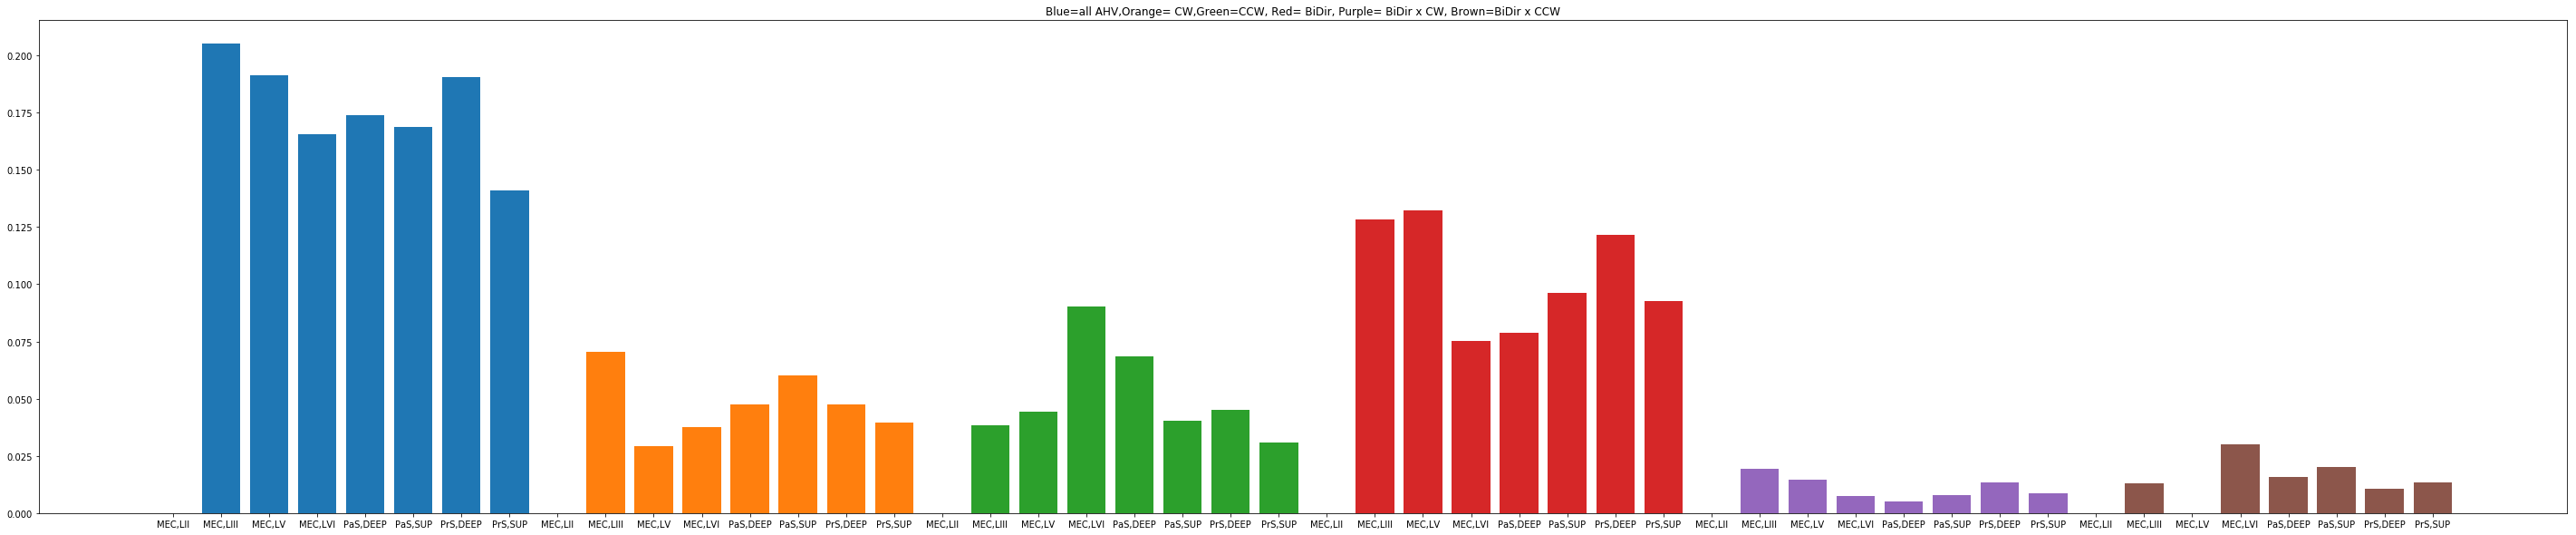

In [108]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(50,10))
heightAHV = AHVpercentages
heightCW = CWpercentages
heightCCW = CCWpercentages
heightABS = ABSpercentages
heightABS_CW = ABS_CWpercentages
heightABS_CCW = ABS_CCWpercentages

bars=BarHandles
y_posAHV = np.arange(len(bars))
y_posCW = np.arange(len(bars))+len(bars)
y_posCCW = np.arange(len(bars))+2*len(bars)
y_posABS = np.arange(len(bars))+3*len(bars)
y_posABS_CW = np.arange(len(bars))+4*len(bars)
y_posABS_CCW = np.arange(len(bars))+5*len(bars)
y_posTOT=np.arange(len(6*bars))
# Create bars
plt.bar(y_posAHV, heightAHV)
plt.bar(y_posCW, heightCW)
plt.bar(y_posCCW, heightCCW)
plt.bar(y_posABS, heightABS)
plt.bar(y_posABS_CW, heightABS_CW)
plt.bar(y_posABS_CCW, heightABS_CCW)
plt.xticks(y_posTOT,bars+bars+bars+bars+bars+bars)
#ylim([0,0.18])
# Create names on the x-axis
title("Blue=all AHV,Orange= CW,Green=CCW, Red= BiDir, Purple= BiDir x CW, Brown=BiDir x CCW")
savefig("S2/H4_allAHV_with_subdivision_percentages_by_Layer.svg")

## CW-CCW-ABS

In [120]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[(MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=MECcells[(MECcells["angularVelocityModulated"]==1) & (MECcells["layer"]==layer)]
    if len(LayerCells)>0:
        a=len(modulated)/len(LayerCells)
        percentages.append(a)
    else:
        percentages.append(0)
    regions.append("MEC")
    print("AHV CW modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(percentages[-1])+" of AHV cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[(PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=PaScells[(PaScells["angularVelocityModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PaS")
    print("AHV CW modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of AHV cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[(PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    modulated=PrScells[(PrScells["angularVelocityModulated"]==1) & (PrScells["layer"]==layer)]
    if len(LayerCells)>0:
        a=len(modulated)/len(LayerCells)
        percentages.append(a)
    else:
        percentages.append(0)
    regions.append("PrS")
    print("AHV CW modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(percentages[-1])+" of AHV cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
AHV CW modulated cells in MEC layer LII: 0/0 , 0.0000 of AHV cells in the layer
AHV CW modulated cells in MEC layer LIII: 11/32 , 0.3438 of AHV cells in the layer
AHV CW modulated cells in MEC layer LV: 2/13 , 0.1538 of AHV cells in the layer
AHV CW modulated cells in MEC layer LVI: 5/22 , 0.2273 of AHV cells in the layer
PaS
AHV CW modulated cells in PaS layer DEEP: 9/33 , 0.2727 of AHV cells in the layer
AHV CW modulated cells in PaS layer SUP: 15/42 , 0.3571 of AHV cells in the layer
PrS
AHV CW modulated cells in PrS layer DEEP: 18/72 , 0.2500 of AHV cells in the layer
AHV CW modulated cells in PrS layer SUP: 9/32 , 0.2812 of AHV cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.6428571428571428, pvalue=0.0009517021213059085)

In [116]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

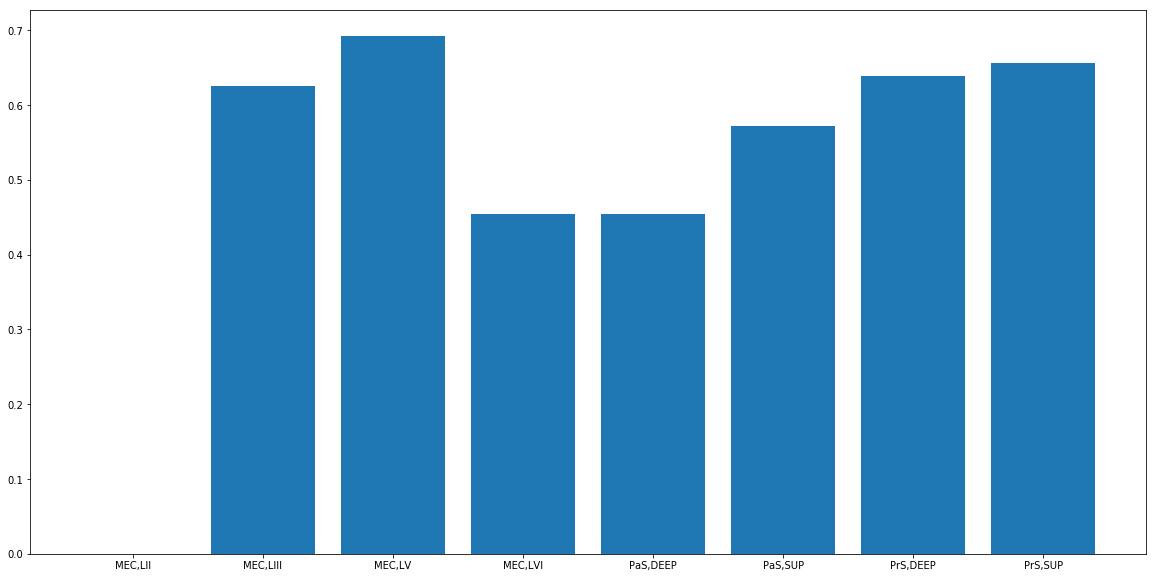

In [117]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S2/H3_ABS_x_layer_percentages_of_AHV.svg")

## Grid, HD and Grid x HD

In [38]:
Gridpercentages=[]
HDpercentages=[]
GridHDpercentages=[]
Grid_modulated_list=[]
HD_modulated_list=[]
GridHD_modulated_list=[]
Grid_tot_num_list=[]
HD_tot_num_list=[]
GridHD_tot_num_list=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    Gridmodulated=MECcells[(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    HDmodulated=MECcells[(MECcells["HDModulated"]==1) & (MECcells["layer"]==layer)]
    GridHDmodulated=MECcells[(MECcells["HDModulated"]==1)&(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    Grid_modulated_list.append(len(Gridmodulated))
    Grid_tot_num_list.append(len(LayerCells))
    HD_modulated_list.append(len(HDmodulated))
    HD_tot_num_list.append(len(LayerCells))
    GridHD_modulated_list.append(len(GridHDmodulated))
    GridHD_tot_num_list.append(len(LayerCells))
    regions.append("MEC")
    print("Grid modulated cells in MEC layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated cells in MEC layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated cells in MEC layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    Gridmodulated=PaScells[(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    HDmodulated=PaScells[(PaScells["HDModulated"]==1) & (PaScells["layer"]==layer)]
    GridHDmodulated=PaScells[(PaScells["HDModulated"]==1)&(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    Grid_modulated_list.append(len(Gridmodulated))
    Grid_tot_num_list.append(len(LayerCells))
    HD_modulated_list.append(len(HDmodulated))
    HD_tot_num_list.append(len(LayerCells))
    GridHD_modulated_list.append(len(GridHDmodulated))
    GridHD_tot_num_list.append(len(LayerCells))
    regions.append("PaS")
    print("Grid modulated cells in PaS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated cells in PaS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated cells in PaS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )
    
# PrS
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    Gridmodulated=PrScells[(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    HDmodulated=PrScells[(PrScells["HDModulated"]==1) & (PrScells["layer"]==layer)]
    GridHDmodulated=PrScells[(PrScells["HDModulated"]==1)&(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    Grid_modulated_list.append(len(Gridmodulated))
    Grid_tot_num_list.append(len(LayerCells))
    HD_modulated_list.append(len(HDmodulated))
    HD_tot_num_list.append(len(LayerCells))
    GridHD_modulated_list.append(len(GridHDmodulated))
    GridHD_tot_num_list.append(len(LayerCells))
    regions.append("PrS")
    print("Grid modulated cells in PrS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated cells in PrS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated cells in PrS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

    
print("\n Grid KS test for uniformity: ")
print(kstest(Gridpercentages,"uniform"))
print("\n HD KS test for uniformity: ")
print(kstest(HDpercentages,"uniform"))
print("\n Grid x HD KS test for uniformity: ")
print(kstest(GridHDpercentages,"uniform"))

MEC
Grid modulated cells in MEC layer LII: 10/35 , 0.2857 of cells in the layer
HD modulated cells in MEC layer LII: 1/35 , 0.0286 of cells in the layer
Grid x HD modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
Grid modulated cells in MEC layer LIII: 56/156 , 0.3590 of cells in the layer
HD modulated cells in MEC layer LIII: 70/156 , 0.4487 of cells in the layer
Grid x HD modulated cells in MEC layer LIII: 29/156 , 0.1859 of cells in the layer
Grid modulated cells in MEC layer LV: 11/68 , 0.1618 of cells in the layer
HD modulated cells in MEC layer LV: 58/68 , 0.8529 of cells in the layer
Grid x HD modulated cells in MEC layer LV: 9/68 , 0.1324 of cells in the layer
Grid modulated cells in MEC layer LVI: 15/133 , 0.1128 of cells in the layer
HD modulated cells in MEC layer LVI: 82/133 , 0.6165 of cells in the layer
Grid x HD modulated cells in MEC layer LVI: 5/133 , 0.0376 of cells in the layer
PaS
Grid modulated cells in PaS layer DEEP: 38/190 , 0.2000 of cells i

In [36]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

In [39]:
# SINGLE LAYER ENRICHMENT TEST
print("GRID")
from statsmodels.stats import proportion
for i in range(len(percentages)):
    count=[Grid_modulated_list[i],sum(Grid_modulated_list)]
    nobs=[Grid_tot_num_list[i],sum(Grid_tot_num_list)]
    zstat,pv=proportion.proportions_ztest(count,nobs)
    print(regions[i]+" "+ AllLayerNames[i]+" : zstat="+str(zstat)+", pvalue="+str(pv))

GRID
MEC LII : zstat=1.6317533474045525, pvalue=0.10273145682029036
MEC LIII : zstat=5.399956167313326, pvalue=6.665718152997935e-08
MEC LV : zstat=-0.3481102401030846, pvalue=0.7277573942456802
MEC LVI : zstat=-1.9115000435881038, pvalue=0.05594035120167476
PaS DEEP : zstat=0.7312883714214498, pvalue=0.46460303179923546
PaS SUP : zstat=-1.2967941241257492, pvalue=0.19470203298115185
PrS DEEP : zstat=-0.2862555493593853, pvalue=0.774682400652928
PrS SUP : zstat=-2.545871383013575, pvalue=0.010900534300515909


In [40]:
# SINGLE LAYER ENRICHMENT TEST
print("HD")
from statsmodels.stats import proportion
for i in range(len(percentages)):
    count=[HD_modulated_list[i],sum(HD_modulated_list)]
    nobs=[HD_tot_num_list[i],sum(HD_tot_num_list)]
    zstat,pv=proportion.proportions_ztest(count,nobs)
    print(regions[i]+" "+ AllLayerNames[i]+" : zstat="+str(zstat)+", pvalue="+str(pv))

HD
MEC LII : zstat=-5.907449506514661, pvalue=3.4744477191510876e-09
MEC LIII : zstat=-2.012206964362684, pvalue=0.04419812466729045
MEC LV : zstat=5.172836761313967, pvalue=2.3056643330439615e-07
MEC LVI : zstat=1.840048409092013, pvalue=0.06576113052055685
PaS DEEP : zstat=2.827649514071061, pvalue=0.004689111305995259
PaS SUP : zstat=-0.5653905497409503, pvalue=0.5718081509753725
PrS DEEP : zstat=-0.6083605733830875, pvalue=0.5429483546149076
PrS SUP : zstat=-1.3696644269760625, pvalue=0.17079167799563166


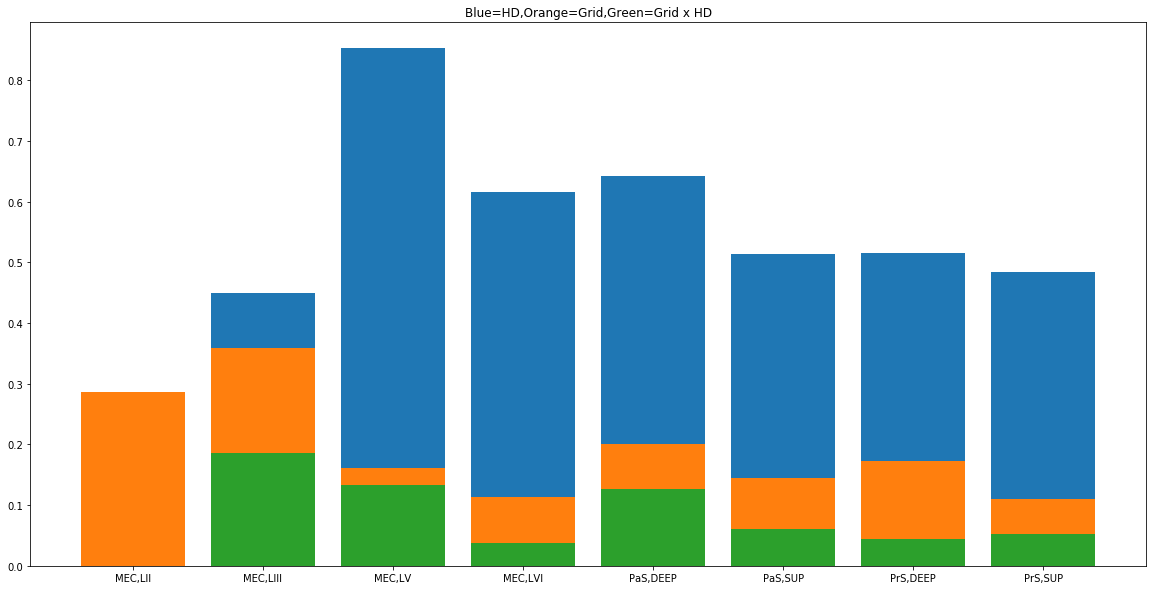

In [71]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
heightGrid = Gridpercentages
heightHD = HDpercentages
heightGridHD = GridHDpercentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, heightHD)
plt.bar(y_pos, heightGrid)
plt.bar(y_pos, heightGridHD)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
title("Blue=HD,Orange=Grid,Green=Grid x HD")
savefig("S5/H1_Grid_HD_GridxHD_percentages_by_Layer.svg")

## Grid, HD and Grid x HD a conjunction with SPEED

In [122]:
Gridpercentages=[]
HDpercentages=[]
GridHDpercentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    Gridmodulated=MECcells[(MECcells["speedModulated"]==1) &(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    HDmodulated=MECcells[(MECcells["speedModulated"]==1) &(MECcells["HDModulated"]==1) & (MECcells["layer"]==layer)]
    GridHDmodulated=MECcells[(MECcells["speedModulated"]==1) &(MECcells["HDModulated"]==1)&(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("MEC")
    print("Grid modulated SPEED cells in MEC layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated SPEED cells in MEC layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated SPEED cells in MEC layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    Gridmodulated=PaScells[(PaScells["speedModulated"]==1) &(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    HDmodulated=PaScells[(PaScells["speedModulated"]==1) &(PaScells["HDModulated"]==1) & (PaScells["layer"]==layer)]
    GridHDmodulated=PaScells[(PaScells["speedModulated"]==1) &(PaScells["HDModulated"]==1)&(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("PaS")
    print("Grid modulated SPEEDcells in PaS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated SPEED cells in PaS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated SPEED cells in PaS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )
    
# PrS
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    Gridmodulated=PrScells[(PrScells["speedModulated"]==1) &(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    HDmodulated=PrScells[(PrScells["speedModulated"]==1) &(PrScells["HDModulated"]==1) & (PrScells["layer"]==layer)]
    GridHDmodulated=PrScells[(PrScells["speedModulated"]==1) &(PrScells["HDModulated"]==1)&(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("PrS")
    print("Grid modulated SPEED cells in PrS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated SPEED cells in PrS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated SPEED cells in PrS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

    
print("\n Grid KS test for uniformity: ")
print(kstest(Gridpercentages,"uniform"))
print("\n HD KS test for uniformity: ")
print(kstest(HDpercentages,"uniform"))
print("\n Grid x HD KS test for uniformity: ")
print(kstest(GridHDpercentages,"uniform"))

MEC
Grid modulated SPEED cells in MEC layer LII: 1/35 , 0.0286 of cells in the layer
HD modulated SPEED cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
Grid x HD modulated SPEED cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
Grid modulated SPEED cells in MEC layer LIII: 12/156 , 0.0769 of cells in the layer
HD modulated SPEED cells in MEC layer LIII: 6/156 , 0.0385 of cells in the layer
Grid x HD modulated SPEED cells in MEC layer LIII: 2/156 , 0.0128 of cells in the layer
Grid modulated SPEED cells in MEC layer LV: 1/68 , 0.0147 of cells in the layer
HD modulated SPEED cells in MEC layer LV: 5/68 , 0.0735 of cells in the layer
Grid x HD modulated SPEED cells in MEC layer LV: 0/68 , 0.0000 of cells in the layer
Grid modulated SPEED cells in MEC layer LVI: 1/133 , 0.0075 of cells in the layer
HD modulated SPEED cells in MEC layer LVI: 9/133 , 0.0677 of cells in the layer
Grid x HD modulated SPEED cells in MEC layer LVI: 0/133 , 0.0000 of cells in the layer
PaS
G

In [73]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

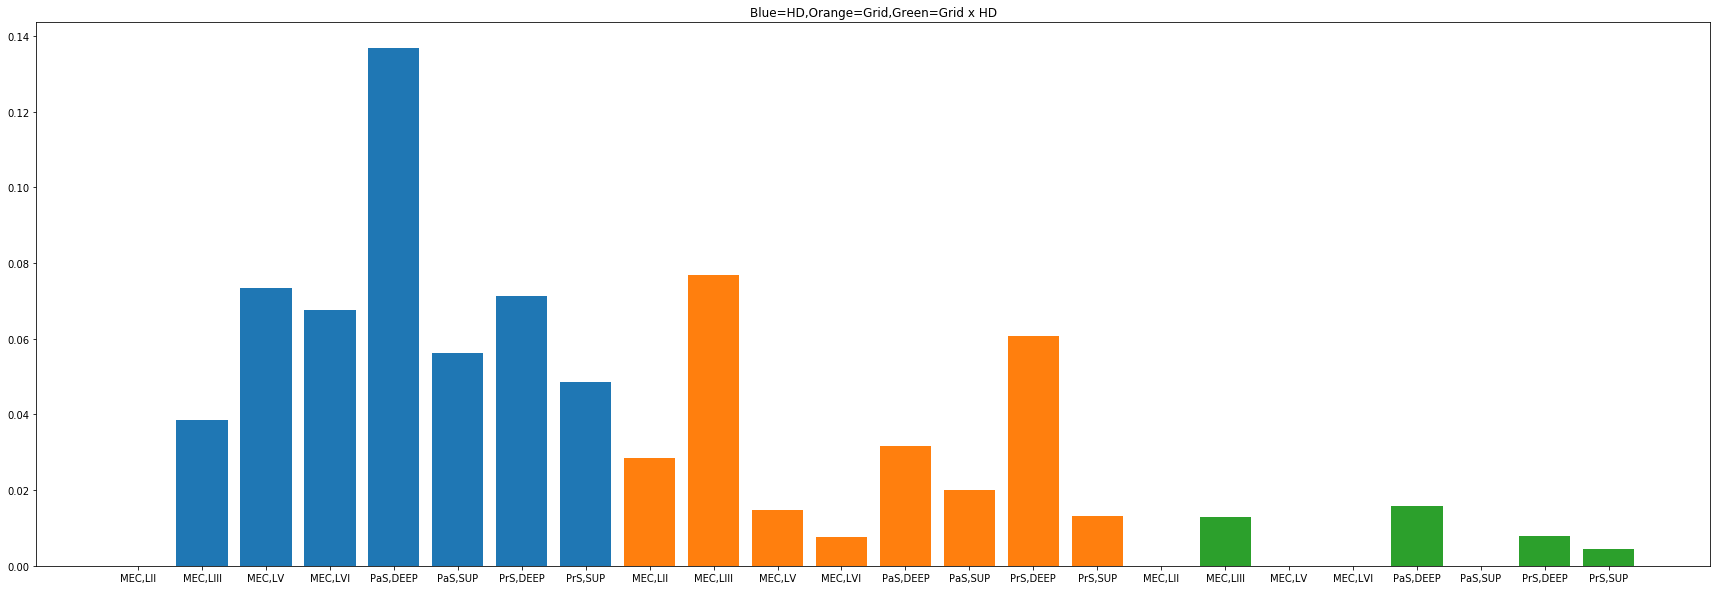

In [75]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(30,10))
heightGrid = Gridpercentages
heightHD = HDpercentages
heightGridHD = GridHDpercentages
bars=BarHandles
y_posHD = np.arange(len(bars))
y_posGrid = np.arange(len(bars))+len(bars)
y_posGridHD = np.arange(len(bars))+2*len(bars)
y_posTOT=np.arange(len(3*bars))
# Create bars
plt.bar(y_posHD, heightHD)
plt.bar(y_posGrid, heightGrid)
plt.bar(y_posGridHD, heightGridHD)
plt.xticks(y_posTOT, bars+bars+bars)
#ylim([0,0.18])
# Create names on the x-axis
title("Blue=HD,Orange=Grid,Green=Grid x HD")
savefig("S5/H2_SPEED_Grid_HD_GridxHD_percentages_by_Layer.svg")

## Grid, HD and Grid x HD a conjunction with AHV

In [123]:
Gridpercentages=[]
HDpercentages=[]
GridHDpercentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    Gridmodulated=MECcells[(MECcells["AHVModulated"]==1) &(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    HDmodulated=MECcells[(MECcells["AHVModulated"]==1) &(MECcells["HDModulated"]==1) & (MECcells["layer"]==layer)]
    GridHDmodulated=MECcells[(MECcells["AHVModulated"]==1) &(MECcells["HDModulated"]==1)&(MECcells["gridModulated"]==1) & (MECcells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("MEC")
    print("Grid modulated AHV cells in MEC layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated AHV cells in MEC layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated AHV cells in MEC layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    Gridmodulated=PaScells[(PaScells["AHVModulated"]==1) &(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    HDmodulated=PaScells[(PaScells["AHVModulated"]==1) &(PaScells["HDModulated"]==1) & (PaScells["layer"]==layer)]
    GridHDmodulated=PaScells[(PaScells["AHVModulated"]==1) &(PaScells["HDModulated"]==1)&(PaScells["gridModulated"]==1) & (PaScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("PaS")
    print("Grid modulated AHVcells in PaS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated AHV cells in PaS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated AHV cells in PaS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )
    
# PrS
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    Gridmodulated=PrScells[(PrScells["AHVModulated"]==1) &(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    HDmodulated=PrScells[(PrScells["AHVModulated"]==1) &(PrScells["HDModulated"]==1) & (PrScells["layer"]==layer)]
    GridHDmodulated=PrScells[(PrScells["AHVModulated"]==1) &(PrScells["HDModulated"]==1)&(PrScells["gridModulated"]==1) & (PrScells["layer"]==layer)]
    Gridpercentages.append(len(Gridmodulated)/len(LayerCells))
    HDpercentages.append(len(HDmodulated)/len(LayerCells))
    GridHDpercentages.append(len(GridHDmodulated)/len(LayerCells))
    regions.append("PrS")
    print("Grid modulated AHV cells in PrS layer "+layer+": "+str(len(Gridmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(Gridmodulated)/len(LayerCells))+" of cells in the layer" )
    print("HD modulated AHV cells in PrS layer "+layer+": "+str(len(HDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(HDmodulated)/len(LayerCells))+" of cells in the layer" )
    print("Grid x HD modulated AHV cells in PrS layer "+layer+": "+str(len(GridHDmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(GridHDmodulated)/len(LayerCells))+" of cells in the layer" )

    
print("\n Grid KS test for uniformity: ")
print(kstest(Gridpercentages,"uniform"))
print("\n HD KS test for uniformity: ")
print(kstest(HDpercentages,"uniform"))
print("\n Grid x HD KS test for uniformity: ")
print(kstest(GridHDpercentages,"uniform"))

MEC
Grid modulated AHV cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
HD modulated AHV cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
Grid x HD modulated AHV cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
Grid modulated AHV cells in MEC layer LIII: 8/156 , 0.0513 of cells in the layer
HD modulated AHV cells in MEC layer LIII: 12/156 , 0.0769 of cells in the layer
Grid x HD modulated AHV cells in MEC layer LIII: 4/156 , 0.0256 of cells in the layer
Grid modulated AHV cells in MEC layer LV: 2/68 , 0.0294 of cells in the layer
HD modulated AHV cells in MEC layer LV: 10/68 , 0.1471 of cells in the layer
Grid x HD modulated AHV cells in MEC layer LV: 2/68 , 0.0294 of cells in the layer
Grid modulated AHV cells in MEC layer LVI: 0/133 , 0.0000 of cells in the layer
HD modulated AHV cells in MEC layer LVI: 14/133 , 0.1053 of cells in the layer
Grid x HD modulated AHV cells in MEC layer LVI: 0/133 , 0.0000 of cells in the layer
PaS
Grid modulated AHVcells

In [77]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

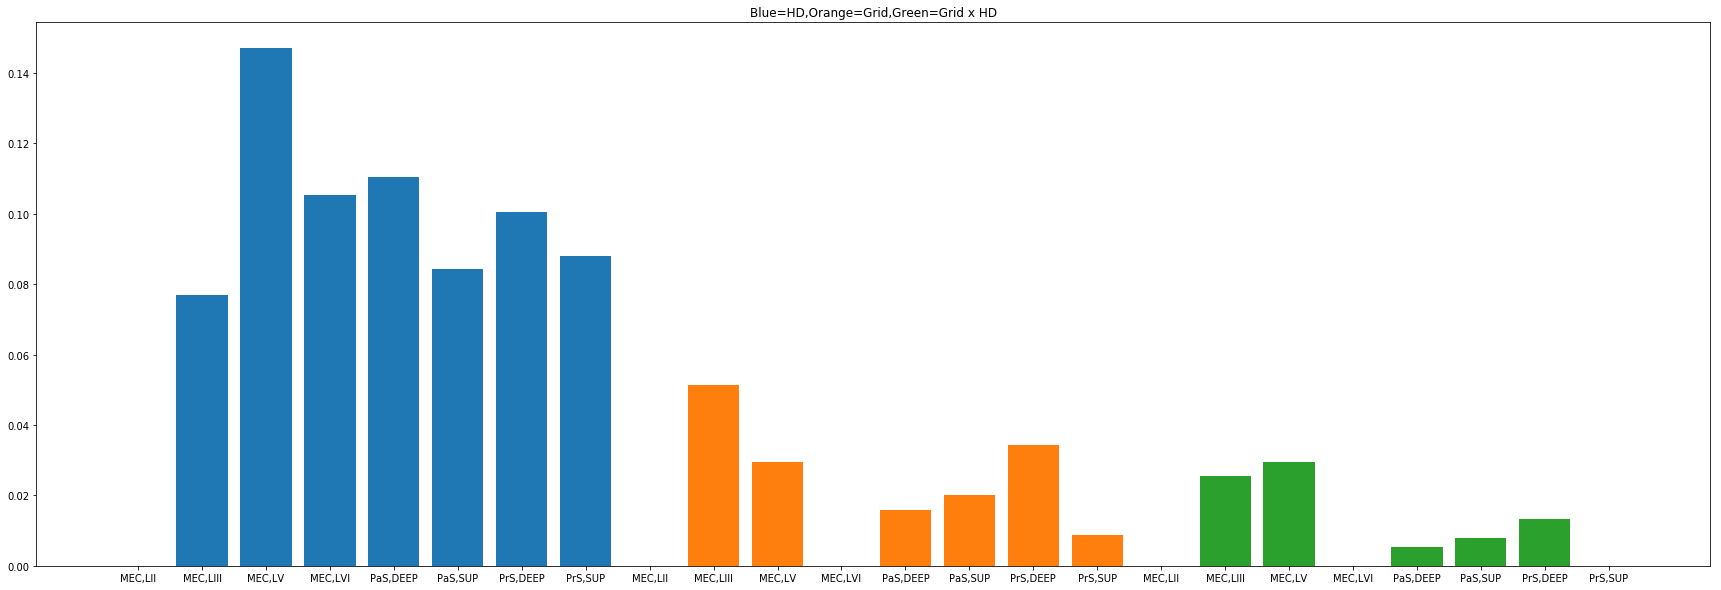

In [78]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(30,10))
heightGrid = Gridpercentages
heightHD = HDpercentages
heightGridHD = GridHDpercentages
bars=BarHandles
y_posHD = np.arange(len(bars))
y_posGrid = np.arange(len(bars))+len(bars)
y_posGridHD = np.arange(len(bars))+2*len(bars)
y_posTOT=np.arange(len(3*bars))
# Create bars
plt.bar(y_posHD, heightHD)
plt.bar(y_posGrid, heightGrid)
plt.bar(y_posGridHD, heightGridHD)
plt.xticks(y_posTOT, bars+bars+bars)
#ylim([0,0.18])
# Create names on the x-axis
title("Blue=HD,Orange=Grid,Green=Grid x HD")
savefig("S5/H3_AHV_Grid_HD_GridxHD_percentages_by_Layer.svg")

## SPEED, AHV, SPEED x AHV

In [124]:
speedpercentages=[]
AHVpercentages=[]
speedAHVpercentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    speedmodulated=MECcells[(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    AHVmodulated=MECcells[(MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    speedAHVmodulated=MECcells[(MECcells["AHVModulated"]==1)&(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    speedpercentages.append(len(speedmodulated)/len(LayerCells))
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    speedAHVpercentages.append(len(speedAHVmodulated)/len(LayerCells))
    regions.append("MEC")
    print("speed modulated cells in MEC layer "+layer+": "+str(len(speedmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedmodulated)/len(LayerCells))+" of cells in the layer" )
    print("AHV modulated cells in MEC layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("speed x AHV modulated cells in MEC layer "+layer+": "+str(len(speedAHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedAHVmodulated)/len(LayerCells))+" of cells in the layer" )

# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    speedmodulated=PaScells[(PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    AHVmodulated=PaScells[(PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    speedAHVmodulated=PaScells[(PaScells["AHVModulated"]==1)&(PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    speedpercentages.append(len(speedmodulated)/len(LayerCells))
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    speedAHVpercentages.append(len(speedAHVmodulated)/len(LayerCells))
    regions.append("PaS")
    print("speed modulated cells in PaS layer "+layer+": "+str(len(speedmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedmodulated)/len(LayerCells))+" of cells in the layer" )
    print("AHV modulated cells in PaS layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("speed x AHV modulated cells in PaS layer "+layer+": "+str(len(speedAHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedAHVmodulated)/len(LayerCells))+" of cells in the layer" )
    
# PrS
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    speedmodulated=PrScells[(PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    AHVmodulated=PrScells[(PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    speedAHVmodulated=PrScells[(PrScells["AHVModulated"]==1)&(PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    speedpercentages.append(len(speedmodulated)/len(LayerCells))
    AHVpercentages.append(len(AHVmodulated)/len(LayerCells))
    speedAHVpercentages.append(len(speedAHVmodulated)/len(LayerCells))
    regions.append("PrS")
    print("speed modulated cells in PrS layer "+layer+": "+str(len(speedmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedmodulated)/len(LayerCells))+" of cells in the layer" )
    print("AHV modulated cells in PrS layer "+layer+": "+str(len(AHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(AHVmodulated)/len(LayerCells))+" of cells in the layer" )
    print("speed x AHV modulated cells in PrS layer "+layer+": "+str(len(speedAHVmodulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(speedAHVmodulated)/len(LayerCells))+" of cells in the layer" )

    
print("\n speed KS test for uniformity: ")
print(kstest(speedpercentages,"uniform"))
print("\n AHV KS test for uniformity: ")
print(kstest(AHVpercentages,"uniform"))
print("\n speed x AHV KS test for uniformity: ")
print(kstest(speedAHVpercentages,"uniform"))

MEC
speed modulated cells in MEC layer LII: 7/35 , 0.2000 of cells in the layer
AHV modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
speed x AHV modulated cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
speed modulated cells in MEC layer LIII: 31/156 , 0.1987 of cells in the layer
AHV modulated cells in MEC layer LIII: 32/156 , 0.2051 of cells in the layer
speed x AHV modulated cells in MEC layer LIII: 9/156 , 0.0577 of cells in the layer
speed modulated cells in MEC layer LV: 8/68 , 0.1176 of cells in the layer
AHV modulated cells in MEC layer LV: 13/68 , 0.1912 of cells in the layer
speed x AHV modulated cells in MEC layer LV: 3/68 , 0.0441 of cells in the layer
speed modulated cells in MEC layer LVI: 18/133 , 0.1353 of cells in the layer
AHV modulated cells in MEC layer LVI: 22/133 , 0.1654 of cells in the layer
speed x AHV modulated cells in MEC layer LVI: 9/133 , 0.0677 of cells in the layer
PaS
speed modulated cells in PaS layer DEEP: 48/190 , 0.2

In [80]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

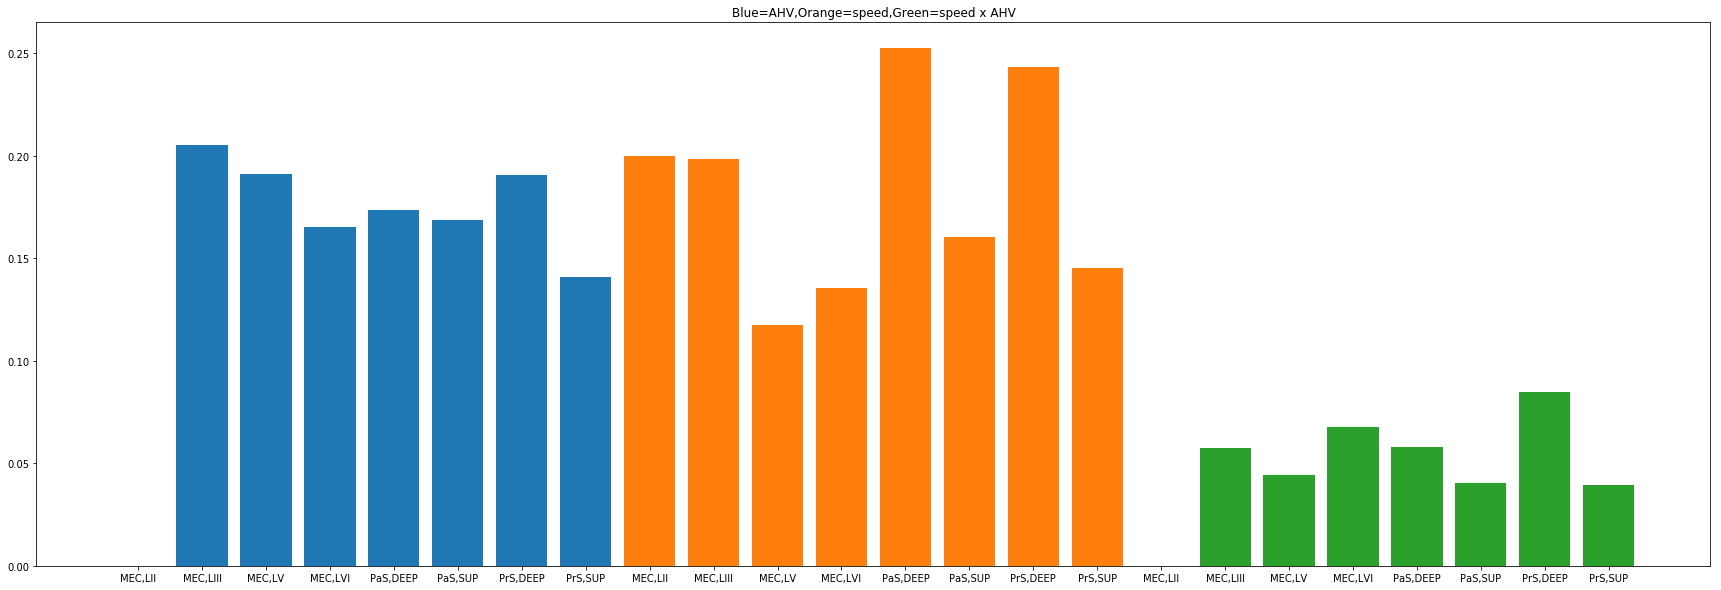

In [81]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(30,10))
heightspeed = speedpercentages
heightAHV = AHVpercentages
heightspeedAHV = speedAHVpercentages
bars=BarHandles
y_posAHV = np.arange(len(bars))
y_posspeed = np.arange(len(bars))+len(bars)
y_posspeedAHV = np.arange(len(bars))+2*len(bars)
y_posTOT=np.arange(len(3*bars))
# Create bars
plt.bar(y_posAHV, heightAHV)
plt.bar(y_posspeed, heightspeed)
plt.bar(y_posspeedAHV, heightspeedAHV)
plt.xticks(y_posTOT, bars+bars+bars)
#ylim([0,0.18])
# Create names on the x-axis
title("Blue=AHV,Orange=speed,Green=speed x AHV")
savefig("S5/H4_AHV_speed__speedxAHV_percentages_by_Layer.svg")

## THETA

In [125]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("MEC")
    print("theta modulated cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PaS")
    print("theta modulated cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["thetaModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PrS")
    print("theta modulated cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
theta modulated cells in MEC layer LII: 26/35 , 0.7429 of cells in the layer
theta modulated cells in MEC layer LIII: 91/156 , 0.5833 of cells in the layer
theta modulated cells in MEC layer LV: 43/68 , 0.6324 of cells in the layer
theta modulated cells in MEC layer LVI: 39/133 , 0.2932 of cells in the layer
PaS
theta modulated cells in PaS layer DEEP: 108/190 , 0.5684 of cells in the layer
theta modulated cells in PaS layer SUP: 105/249 , 0.4217 of cells in the layer
PrS
theta modulated cells in PrS layer DEEP: 124/378 , 0.3280 of cells in the layer
theta modulated cells in PrS layer SUP: 68/227 , 0.2996 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.2932330827067669, pvalue=0.42051602604022564)

In [83]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

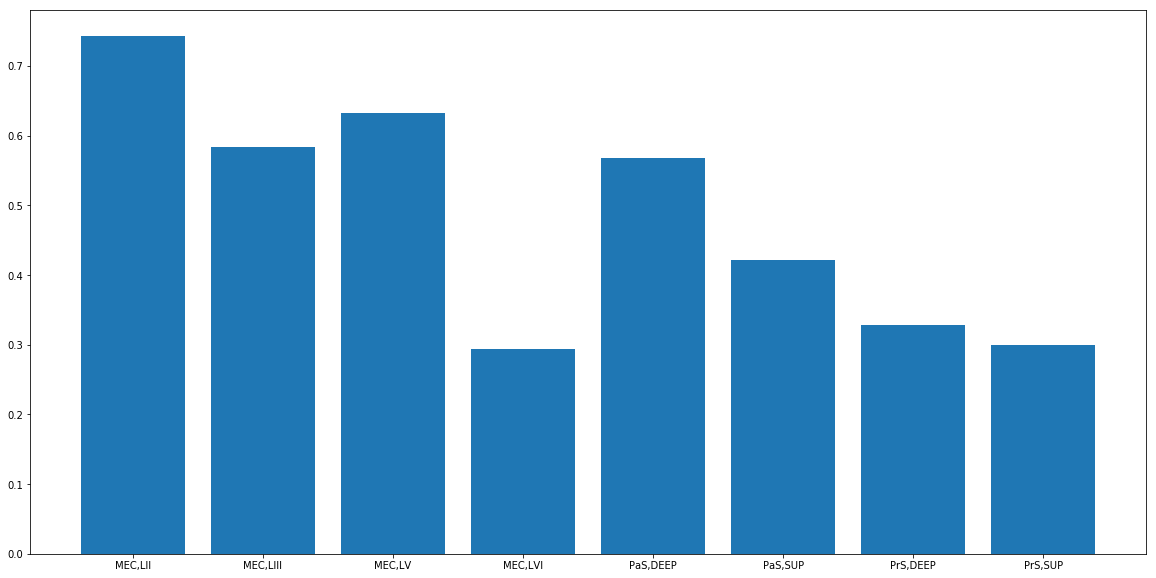

In [84]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S6/H1_theta_by_layer.svg")

## THETA x SPEED

In [126]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("MEC")
    print("theta modulated SPEED cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PaS")
    print("theta modulated SPEED cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["thetaModulated"]==1)& (PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PrS")
    print("theta modulated SPEED cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
theta modulated SPEED cells in MEC layer LII: 5/35 , 0.1429 of cells in the layer
theta modulated SPEED cells in MEC layer LIII: 16/156 , 0.1026 of cells in the layer
theta modulated SPEED cells in MEC layer LV: 4/68 , 0.0588 of cells in the layer
theta modulated SPEED cells in MEC layer LVI: 5/133 , 0.0376 of cells in the layer
PaS
theta modulated SPEED cells in PaS layer DEEP: 24/190 , 0.1263 of cells in the layer
theta modulated SPEED cells in PaS layer SUP: 14/249 , 0.0562 of cells in the layer
PrS
theta modulated SPEED cells in PrS layer DEEP: 32/378 , 0.0847 of cells in the layer
theta modulated SPEED cells in PrS layer SUP: 14/227 , 0.0617 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.8571428571428572, pvalue=3.469409917133959e-07)

In [86]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

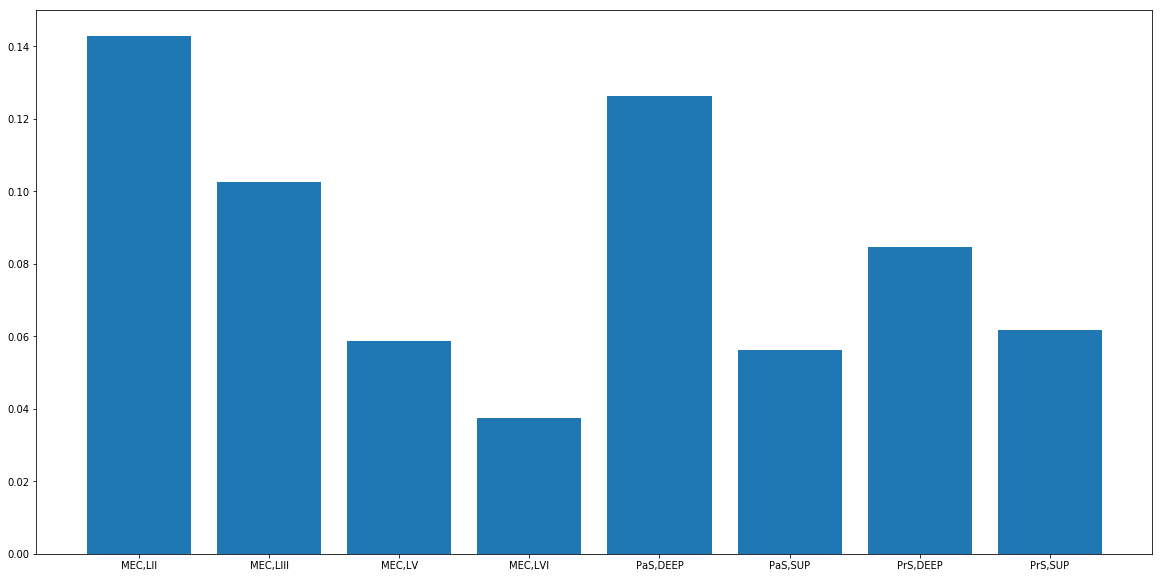

In [87]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S6/H2_theta_x_SPEED_by_layer.svg")

In [48]:
#speed x theta: in MEC Sup > MEC deep
modulated1=5+16
modulated2=4+5
tot1=35+156
tot2=68+133
count=[modulated1,modulated2]
nobs=[tot1,tot2]
zstat,pv=proportion.proportions_ztest(count,nobs)
print(zstat,pv)

2.426055399806423 0.015263940020008736


In [49]:
#speed x theta: in MEC Sup > MEC deep
modulated1=14
modulated2=24
tot1=249
tot2=190
count=[modulated1,modulated2]
nobs=[tot1,tot2]
zstat,pv=proportion.proportions_ztest(count,nobs)
print(zstat,pv)

-2.5876547018625775 0.009663179324077193


## THETA x SPEED percentages of speed

In [127]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    speedCells=MECcells[(MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["speedModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(speedCells))
    regions.append("MEC")
    print("theta modulated SPEED cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(speedCells))+" , "+"{0:.4f}".format(len(modulated)/len(speedCells))+" of speed cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    speedCells=PaScells[ (PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["speedModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(speedCells))
    regions.append("PaS")
    print("theta modulated SPEED cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(speedCells))+" , "+"{0:.4f}".format(len(modulated)/len(speedCells))+" of speed cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    speedCells=PrScells[ (PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    modulated=PrScells[(PrScells["thetaModulated"]==1)& (PrScells["speedModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(speedCells))
    regions.append("PrS")
    print("theta modulated SPEED cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(speedCells))+" , "+"{0:.4f}".format(len(modulated)/len(speedCells))+" of speed cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
theta modulated SPEED cells in MEC layer LII: 5/7 , 0.7143 of speed cells in the layer
theta modulated SPEED cells in MEC layer LIII: 16/31 , 0.5161 of speed cells in the layer
theta modulated SPEED cells in MEC layer LV: 4/8 , 0.5000 of speed cells in the layer
theta modulated SPEED cells in MEC layer LVI: 5/18 , 0.2778 of speed cells in the layer
PaS
theta modulated SPEED cells in PaS layer DEEP: 24/48 , 0.5000 of speed cells in the layer
theta modulated SPEED cells in PaS layer SUP: 14/40 , 0.3500 of speed cells in the layer
PrS
theta modulated SPEED cells in PrS layer DEEP: 32/92 , 0.3478 of speed cells in the layer
theta modulated SPEED cells in PrS layer SUP: 14/33 , 0.4242 of speed cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.3588709677419355, pvalue=0.1986100279491303)

In [89]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

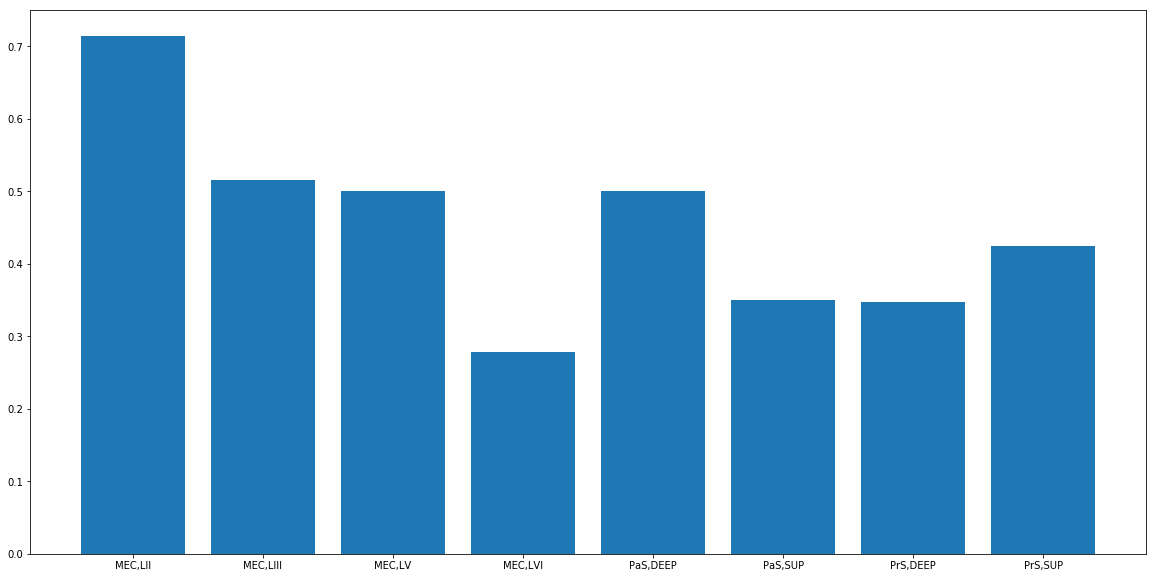

In [90]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S6/H5_theta_x_SPEED_by_layer_percentages_of_speed.svg")

## THETA x AHV

In [91]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("MEC")
    print("theta modulated AHV cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PaS")
    print("theta modulated AHV cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    modulated=PrScells[(PrScells["thetaModulated"]==1)& (PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(LayerCells))
    regions.append("PrS")
    print("theta modulated AHV cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(LayerCells))+" , "+"{0:.4f}".format(len(modulated)/len(LayerCells))+" of cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
theta modulated AHV cells in MEC layer LII: 0/35 , 0.0000 of cells in the layer
theta modulated AHV cells in MEC layer LIII: 14/156 , 0.0897 of cells in the layer
theta modulated AHV cells in MEC layer LV: 9/68 , 0.1324 of cells in the layer
theta modulated AHV cells in MEC layer LVI: 3/133 , 0.0226 of cells in the layer
PaS
theta modulated AHV cells in PaS layer DEEP: 15/190 , 0.0789 of cells in the layer
theta modulated AHV cells in PaS layer SUP: 15/249 , 0.0602 of cells in the layer
PrS
theta modulated AHV cells in PrS layer DEEP: 29/378 , 0.0767 of cells in the layer
theta modulated AHV cells in PrS layer SUP: 10/227 , 0.0441 of cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.8676470588235294, pvalue=1.8832102388621763e-07)

In [92]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

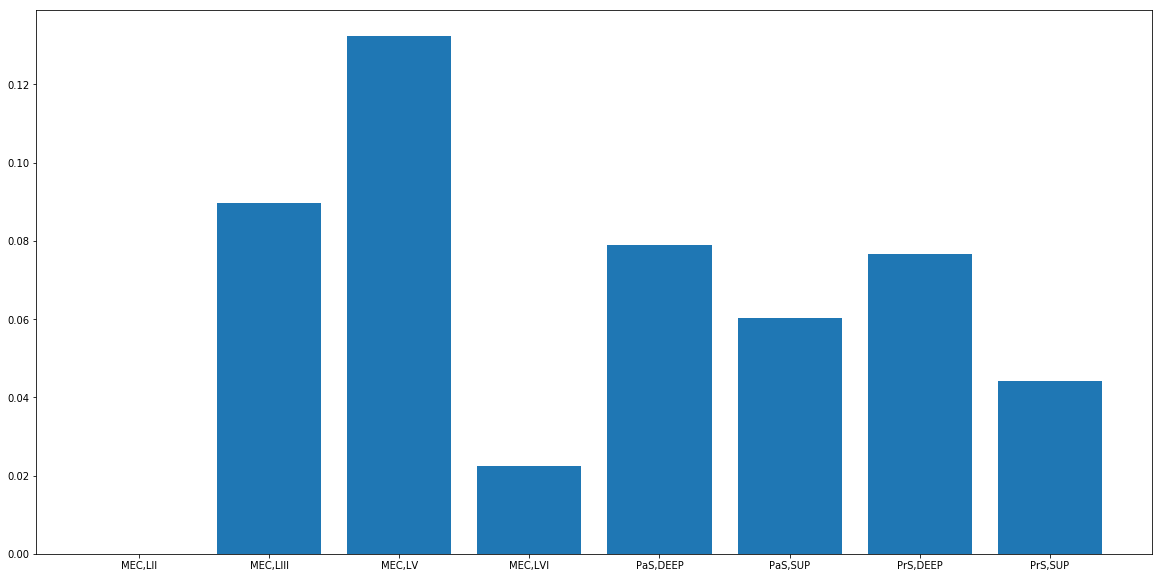

In [93]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S6/H3_theta_x_AHV_by_layer.svg")

## THETA x AHV percentages of AHV

In [128]:
percentages=[]
regions=[]
# MEC
print("MEC")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values)
MECcells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]
for layer in LayerNames:
    LayerCells=MECcells[MECcells["layer"]==layer]
    AHVCells=MECcells[(MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    modulated=MECcells[(MECcells["thetaModulated"]==1) & (MECcells["AHVModulated"]==1) & (MECcells["layer"]==layer)]
    if len(AHVCells)!=0:
        percentages.append(len(modulated)/len(AHVCells))
    else:
        percentages.append(0)
    regions.append("MEC")
    print("theta modulated AHV cells in MEC layer "+layer+": "+str(len(modulated))+"/"+str(len(AHVCells))+" , "+"{0:.4f}".format(percentages[-1])+" of AHV cells in the layer" )
    
# PaS
print("PaS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values)
PaScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]
for layer in LayerNames:
    LayerCells=PaScells[PaScells["layer"]==layer]
    AHVCells=PaScells[(PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    modulated=PaScells[(PaScells["thetaModulated"]==1) & (PaScells["AHVModulated"]==1) & (PaScells["layer"]==layer)]
    percentages.append(len(modulated)/len(AHVCells))
    regions.append("PaS")
    print("theta modulated AHV cells in PaS layer "+layer+": "+str(len(modulated))+"/"+str(len(AHVCells))+" , "+"{0:.4f}".format(len(modulated)/len(AHVCells))+" of AHV cells in the layer" )
    
#PrS    
print("PrS")
LayerNames=unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values)
PrScells=cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]
for layer in LayerNames:
    LayerCells=PrScells[PrScells["layer"]==layer]
    AHVCells=PrScells[(PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    modulated=PrScells[(PrScells["thetaModulated"]==1)& (PrScells["AHVModulated"]==1) & (PrScells["layer"]==layer)]
    percentages.append(len(modulated)/len(AHVCells))
    regions.append("PrS")
    print("theta modulated AHV cells in PrS layer "+layer+": "+str(len(modulated))+"/"+str(len(AHVCells))+" , "+"{0:.4f}".format(len(modulated)/len(AHVCells))+" of AHV cells in the layer" )

print("\n KS test for uniformity: ")
kstest(percentages,"uniform")

MEC
theta modulated AHV cells in MEC layer LII: 0/0 , 0.0000 of AHV cells in the layer
theta modulated AHV cells in MEC layer LIII: 14/32 , 0.4375 of AHV cells in the layer
theta modulated AHV cells in MEC layer LV: 9/13 , 0.6923 of AHV cells in the layer
theta modulated AHV cells in MEC layer LVI: 3/22 , 0.1364 of AHV cells in the layer
PaS
theta modulated AHV cells in PaS layer DEEP: 15/33 , 0.4545 of AHV cells in the layer
theta modulated AHV cells in PaS layer SUP: 15/42 , 0.3571 of AHV cells in the layer
PrS
theta modulated AHV cells in PrS layer DEEP: 29/72 , 0.4028 of AHV cells in the layer
theta modulated AHV cells in PrS layer SUP: 10/32 , 0.3125 of AHV cells in the layer

 KS test for uniformity: 


KstestResult(statistic=0.42045454545454547, pvalue=0.0851485462940964)

In [96]:
MECLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='MEC')]["layer"].values))
PASLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PaS')]["layer"].values))
PRSLayerNames=list(unique(cellMetadata[(cellMetadata["include"]==1) & (cellMetadata["region"]=='PrS')]["layer"].values))
AllLayerNames=MECLayerNames+PASLayerNames+PRSLayerNames
BarHandles=[]
for i in range(len(AllLayerNames)):
    BarHandles.append(regions[i]+","+AllLayerNames[i])

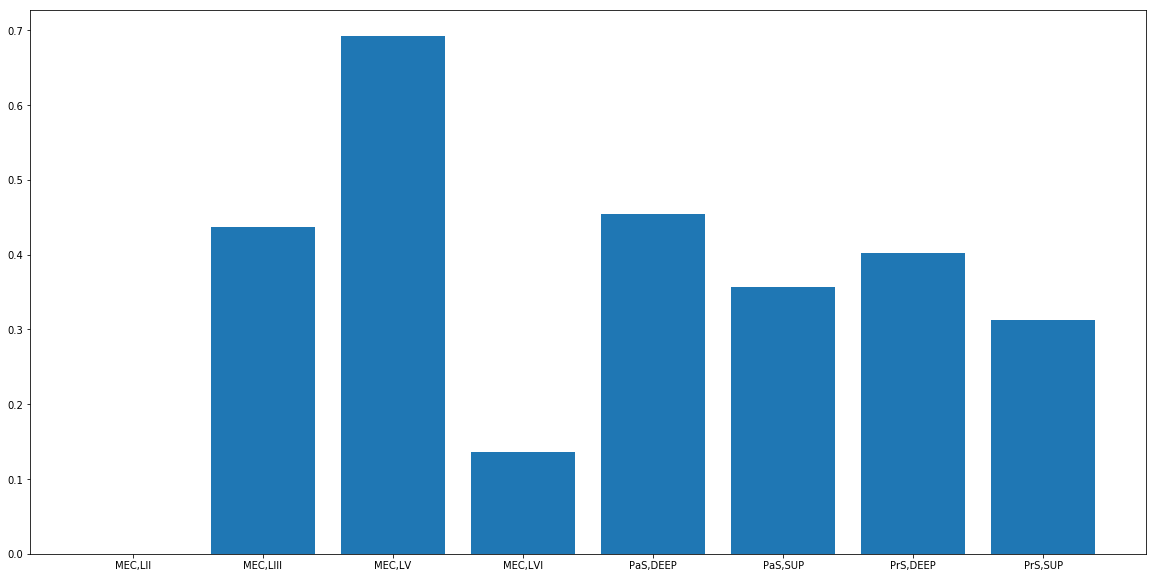

In [97]:
#BARPLOT
# Make a fake dataset:
figure(figsize=(20,10))
height = percentages
bars=BarHandles
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
#ylim([0,0.18])
# Create names on the x-axis
plt.xticks(y_pos, bars)
savefig("S6/H4_theta_x_AHV_by_layer_percentages_of_AHV.svg")